In [1]:
!pip install  wbdata

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
import wbdata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read train and test data from 'MyDrive/Kaggle/forecasting-sales/data'

train_df = pd.read_csv('/content/drive/MyDrive/Kaggle/forecasting-sales/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle/forecasting-sales/data/test.csv')
submission_df = pd.read_csv('/content/drive/MyDrive/Kaggle/forecasting-sales/data/sample_submission.csv')


In [4]:
train_df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [5]:
test_df.head()


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [6]:
# Get unique countries and their counts

train_df['country'].value_counts()

,count
country,
Canada,38355
Finland,38355
Italy,38355
Kenya,38355
Norway,38355
Singapore,38355


In [7]:
# Get unique products and their value counts

train_df['product'].value_counts()

,count
product,
Holographic Goose,46026
Kaggle,46026
Kaggle Tiers,46026
Kerneler,46026
Kerneler Dark Mode,46026


In [8]:
# Get a cross tab of products and country value counts

pd.crosstab(train_df['country'], train_df['product'])

product,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode
country,,,,,
Canada,7671,7671,7671,7671,7671
Finland,7671,7671,7671,7671,7671
Italy,7671,7671,7671,7671,7671
Kenya,7671,7671,7671,7671,7671
Norway,7671,7671,7671,7671,7671
Singapore,7671,7671,7671,7671,7671


In [9]:
# convert the date column to date format

train_df['date'] = pd.to_datetime(train_df['date'])

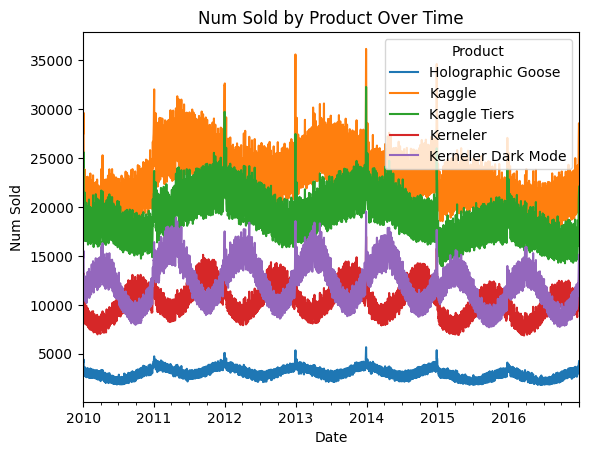

In [10]:
# plot the num_sold column, with separate lines for each product.
# 1. Group data by product and date, summing num_sold
product_sales = train_df.groupby(['product', 'date'])['num_sold'].sum().reset_index()

# 2. Pivot the table to have products as columns and dates as index
product_sales = product_sales.pivot(index='date', columns='product', values='num_sold')

# 3. Plot the data
product_sales.plot(kind='line')
plt.title('Num Sold by Product Over Time')
plt.xlabel('Date')
plt.ylabel('Num Sold')
plt.legend(title='Product')
plt.show()

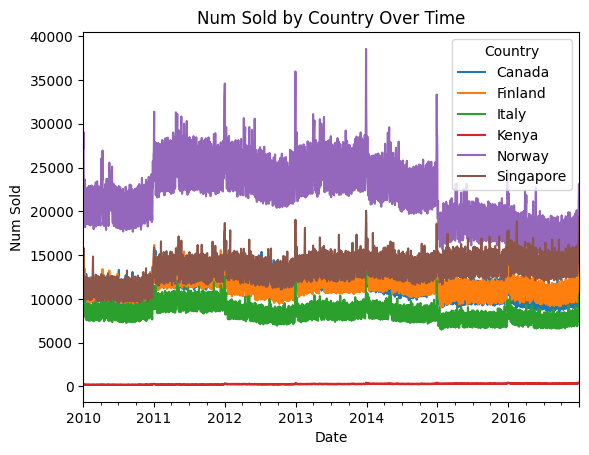

In [11]:
# plot the num_sold column, with separate lines for each Country.

# 1. Group data by country and date, summing num_sold
product_sales = train_df.groupby(['country', 'date'])['num_sold'].sum().reset_index()

# 2. Pivot the table to have country as columns and dates as index
product_sales = product_sales.pivot(index='date', columns='country', values='num_sold')

# 3. Plot the data
product_sales.plot(kind='line')
plt.title('Num Sold by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Num Sold')
plt.legend(title='Country')
plt.show()

In [12]:
# Define the countries and years
countries = ['CA', 'FI', 'IT', 'KE', 'NO', 'SG']  # Country codes
years = range(2010, 2020)  # Years 2010 to 2019 inclusive

# Create a dictionary to store the holidays
holiday_data = {}

# Loop through countries and years to get holidays
for country_code in countries:
    country_holidays = []
    for year in years:
        for date, name in sorted(holidays.country_holidays(country_code, years=year).items()):
            country_holidays.append({'date': date, 'name': name, 'country_code': country_code})
    holiday_data[country_code] = country_holidays

# Create a pandas DataFrame from the holiday data
holiday_df = pd.DataFrame([(item['date'], item['name'], item['country_code']) for items in holiday_data.values() for item in items],
                           columns=['date', 'holiday_name', 'country_code'])
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

# Display the DataFrame
holiday_df

,date,holiday_name,country_code
0,2010-01-01,New Year's Day,CA
1,2010-04-02,Good Friday,CA
2,2010-07-01,Canada Day,CA
3,2010-09-06,Labor Day,CA
4,2010-12-25,Christmas Day,CA
...,...,...,...
673,2019-08-11,Eid al-Adha,SG
674,2019-08-12,Eid al-Adha (observed),SG
675,2019-10-27,Deepavali,SG
676,2019-10-28,Deepavali (observed),SG


In [13]:
# Define a dictionary mapping country names to codes
country_mapping = {
    'Canada': 'CA',
    'Finland': 'FI',
    'Italy': 'IT',
    'Kenya': 'KE',
    'Norway': 'NO',
    'Singapore': 'SG'
}

# Create the 'country_code' column using the mapping
train_df['country_code'] = train_df['country'].map(country_mapping)

# Display the updated DataFrame
train_df.head()

,id,date,country,store,product,num_sold,country_code
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,CA
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,CA
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,CA
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,CA
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,CA


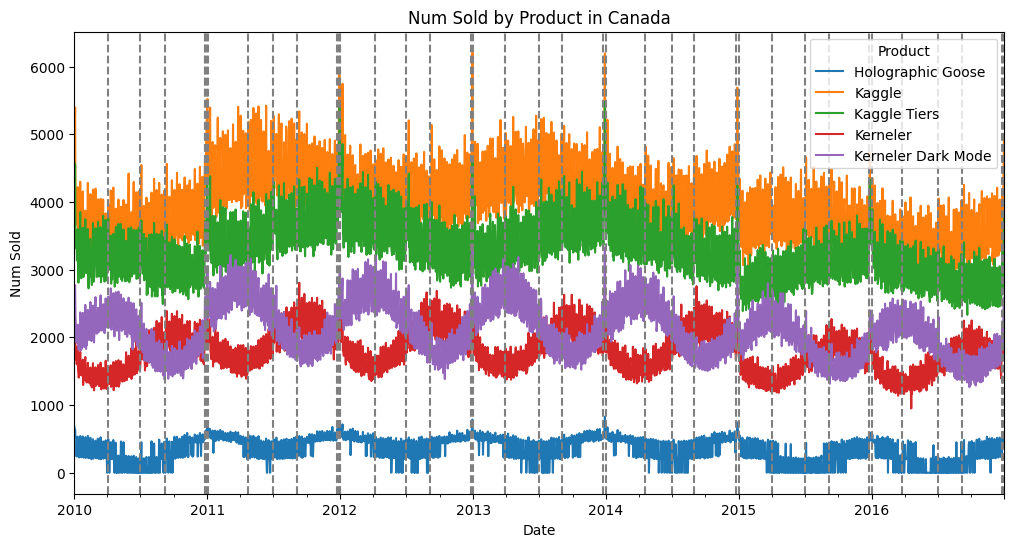

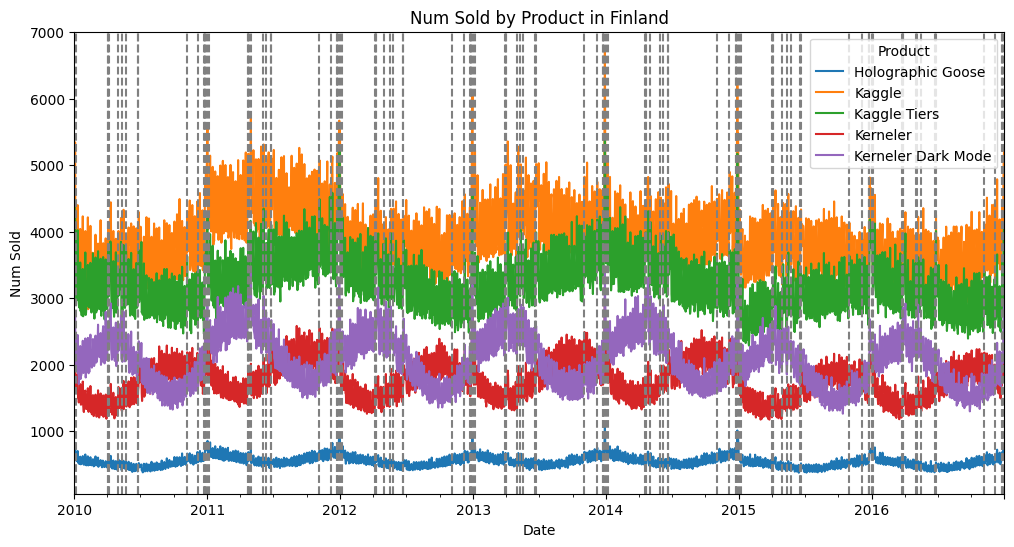

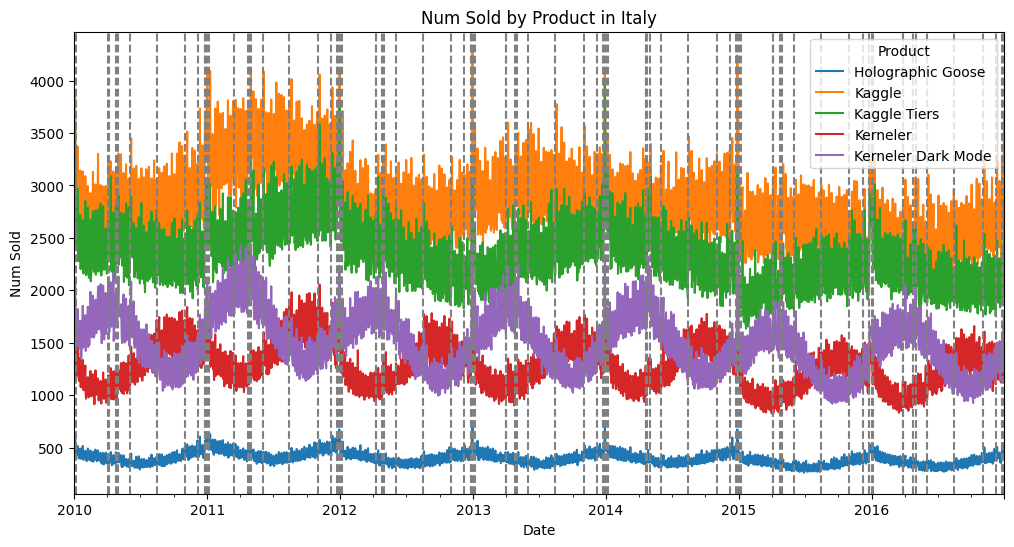

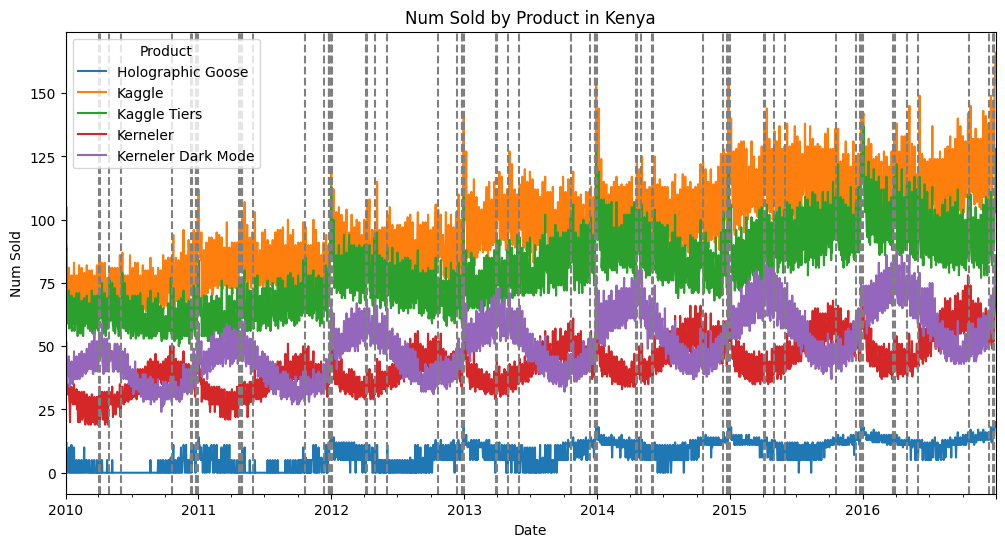

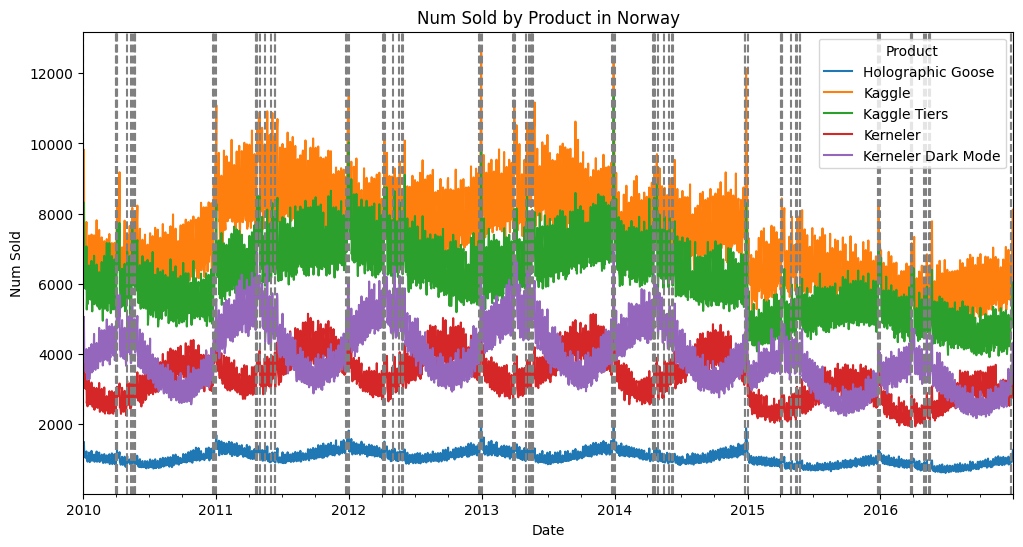

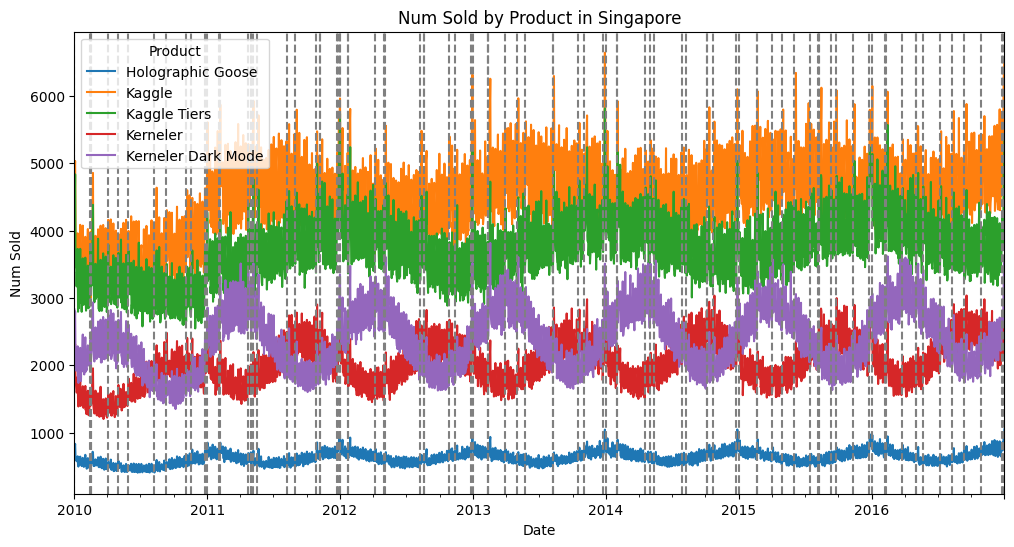

In [14]:
# 1. Merge the train_df and holiday_df DataFrames
merged_df = pd.merge(train_df, holiday_df, on=['date', 'country_code'], how='left')

# 2. Get unique countries
countries = merged_df['country'].unique()

# 3. Iterate through countries and create plots
for country in countries:
    # Filter data for the current country
    country_data = merged_df[merged_df['country'] == country]

    # Group data by product and date, summing num_sold
    product_sales = country_data.groupby(['product', 'date'])['num_sold'].sum().reset_index()

    # Pivot the table to have products as columns and dates as index
    product_sales = product_sales.pivot(index='date', columns='product', values='num_sold')

    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the num_sold lines for each product
    product_sales.plot(kind='line', ax=ax)

    # Add vertical dotted lines for holidays
    holidays_dates = country_data[country_data['holiday_name'].notnull()]['date'].unique()
    for holiday_date in holidays_dates:
        ax.axvline(x=holiday_date, color='gray', linestyle='--')

    # Set plot title and labels
    ax.set_title(f'Num Sold by Product in {country}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Num Sold')
    ax.legend(title='Product')

    # Show the plot
    plt.show()

In [18]:
# Get per capita gdp data as that seems to be an indicator

countries = ["CAN", "FIN", "ITA", "KEN", "NOR", "SGP"]
indicator = {'NY.GDP.PCAP.CD': 'GDP per capita (current US$)'}

In [19]:
# Set the start and end dates
data_date = (pd.Timestamp('2010-01-01'), pd.Timestamp('2019-12-31'))

# Fetch the data
df = wbdata.get_dataframe(indicator, country=countries, date=data_date)

# Reset the index to make 'country' and 'date' columns
df = df.reset_index()

# Rename the 'GDP per capita (current US$)' column to 'gdp_per_capita'
df = df.rename(columns={'GDP per capita (current US$)': 'gdp_per_capita'})

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [20]:
# Create a daily date range
date_range = pd.date_range(start='2010-01-01', end='2019-12-31', freq='D')

# Create an empty DataFrame to store the daily data
daily_df = pd.DataFrame({'date': date_range})

# Merge the daily DataFrame with the original DataFrame to fill in GDP values
daily_df = pd.merge(daily_df, df, on='date', how='left')

# Forward fill missing GDP values to create constant values between dates
daily_df['gdp_per_capita'] = daily_df.groupby('country')['gdp_per_capita'].ffill()
daily_df['country'] = daily_df.groupby('country')['country'].ffill()

# Display the resulting DataFrame
daily_df

,date,country,gdp_per_capita
0,2010-01-01,Canada,47560.666601
1,2010-01-01,Finland,46506.291902
2,2010-01-01,Italy,36184.711870
3,2010-01-01,Kenya,1091.518731
4,2010-01-01,Norway,88163.208593
...,...,...,...
3697,2019-12-27,NaN,NaN
3698,2019-12-28,NaN,NaN
3699,2019-12-29,NaN,NaN
3700,2019-12-30,NaN,NaN


Timestamp('2019-01-01 00:00:00')